In [285]:
# The Packeges required to run script
import json
import pandas as pd
import glob
import os
import matplotlib .pyplot as plt
from tabulate import tabulate

In [286]:
# example Protfolio, this protfolio will be saved to a ".json" file.
# to use different portfolio this cell can be ignored, the  protfolio file needs the name & in the directery as follows: "data/portfolio.json"

portfolio = {'GOOGL': {'order_volume': [100], 'order_date': ['2010-07-09']},
 'TM': {'order_volume': [132], 'order_date': ['1997-05-01']},
 'TSM': {'order_volume': [5], 'order_date': ['2009-11-03']},
 'LPL': {'order_volume': [186], 'order_date': ['2011-12-06']},
 'PLUG': {'order_volume': [86], 'order_date': ['2018-08-24']},
 'ED': {'order_volume': [10], 'order_date': ['2007-01-03']},
 'ICLN': {'order_volume': [251], 'order_date': ['2009-07-01']},
 'ABTX': {'order_volume': [75], 'order_date': ['2016-04-01']},
 'AAAU': {'order_volume': [87], 'order_date': ['2020-04-01']}}


json.dumps(portfolio)
with open("data/portfolio.json", "w") as f:
    f.write(json.dumps(portfolio))


In [287]:
# This function is ued to plot the data stored in the ".csv" filed in the dir "data/stocks/" & "data/etfs/"
def plot_close(filename : str, marker : bool)-> None:
    """Plots the  ".csv" filed in the dir "data/stocks/" & "data/etfs/"
    
    Args:
        filename - Symbol of the Stock or ETF to be Plotted,
        marker - 'True' for Stocks, 'False' for ETfs
    """
    if marker and os.path.exists(f"data/stocks/{filename}.csv"):
        ALL = pd.read_csv("data/symbols_valid_meta.csv")
        path = "data/stocks/"
        stock_csv = []
        stock_csv = pd.read_csv(f"{path + filename}.csv" )
        asset_data = ALL[ALL.Symbol == filename]
        asset_name = asset_data["Security Name"].values[0]
        stock_csv.plot(stock_csv.columns[0],stock_csv.columns[4])
        plt.title(asset_name)
        plt.savefig(f"data/Plots/Stocks_{filename}")
        # plt.close()

    if (not marker) and os.path.exists(f"data/etfs/{filename}.csv"):
        ALL = pd.read_csv("data/symbols_valid_meta.csv")
        path = "data/etfs/"
        stock_csv = []
        stock_csv = pd.read_csv(f"{path + filename}.csv" )
        asset_data = ALL[ALL.Symbol == filename]
        asset_name = asset_data["Security Name"].values[0]
        stock_csv.plot(stock_csv.columns[0],stock_csv.columns[4])
        plt.title(asset_name)
        plt.savefig(f"data/Plots/ETFs_{filename}")
        # plt.close()
    return None

In [288]:
#Finds the Profit/lose made with a stock/ETFs.
def profit(key : str, portfolio_list, marker : bool) -> (float, float, bool):
    """Finds the Profit/lose made with a stock/ETFs.
        Outputs the symbol of the stock, 
        If Profit is made, 
        The profit made with a Singel Volume of the Stock/ETF,
        The profit made with a All the Volumes owned in the portfolio of the Stock/ETF,
    
    Args:
        key - Symbol of the Stock or ETF to be Plotted,
        marker - 'True' for Stocks, 'False' for ETfs
    """
    if marker:
        if os.path.exists(f"data/stocks/{key}.csv"):
            Stocks = pd.read_csv(f"data/stocks/{key}.csv")
            start_day = Stocks[Stocks.Date == (str(portfolio_list[key]["order_date"][0]))]
            start_close = float(start_day["Close"])
            last_day = Stocks.iloc[-1:]
            last_close = float(last_day["Close"])
            diff = last_close - start_close
            order_volume = list(portfolio_list[key]["order_volume"])
            total_diff = diff * order_volume[0]
            if diff <= 0 :
                profit = False
            elif diff > 0:
                profit = True
            return key, profit, diff, total_diff
        elif not os.path.exists(f"data/stocks/{key}.csv"):
            # print("ERROR: There is no Stockdata on: ", key)
            return  None

    if not marker:
        if os.path.exists(f"data/etfs/{key}.csv"):
            Stocks = pd.read_csv(f"data/etfs/{key}.csv")
            start_day = Stocks[Stocks.Date == (str(portfolio_list[key]["order_date"][0]))]
            start_close = float(start_day["Close"])
            last_day = Stocks.iloc[-1:]
            last_close = float(last_day["Close"])
            diff = last_close - start_close
            order_volume = list(portfolio_list[key]["order_volume"])
            total_diff = diff * order_volume[0]
            if diff <= 0 :
                profit = False
            elif diff > 0:
                profit = True
            return key, profit, diff, total_diff
        elif not os.path.exists(f"data/etfs/{key}.csv"):
            # print("ERROR: There is no ETFdata on: ", key)
            return None
    

In [289]:
#Funktion to find the Top two most profital Stocks/ETFs in the Portfolio.

def find_top(top_list : list)->list:
    """find the Top two most profital Stocks/ETFs in the Portfolio.

    Args:
        top_list - Symbol List in the portfolie to find most profital.
    """
    top_list.sort(key=lambda row: (row[2]), reverse=True)
    return top_list[0:2]
    

In [290]:
def find_bottom(top_list : list)->list:
    """find the Bottom two least profital Stocks/ETFs in the Portfolio.

    Args:
        top_list - Symbol List in the portfolie to find least profital.
    """
    top_list.sort(key=lambda row: (row[2]), reverse=False)
    return top_list[0:2]

In [291]:
# Ask if the user wonts to see Stocks/ETFs
def ask_stock_etf()-> (bool,bool):
    """Ask for Stocks/ETFs

    Args:

    """
    question = input("Are you interested in stocks data? [Y/N]: ")
    if question == "Y":
        stocks_t = True
    elif question == "N":
        stocks_t = False
    else:
        print("Wrong imput, Stocks will not be looked at")


    question = input("Are you interested in etfs data? [Y/N]: ")
    if question == "Y":
        etfs_t = True
    elif question == "N":
        etfs_t = False
    else:
        print("Wrong imput, ETFs will not be looked at")

    return stocks_t, etfs_t

In [292]:
def write_to_txt(profit_stocks_list, profit_etfs_list, top_2_stock, bottom_2_stock, top_2_etf, bottom_2_etf, test3, test4) -> None:
    """Print the results to a txt file

    Args:
    profit_stocks_list, profit_etfs_list, top_2_stock, bottom_2_stock, top_2_etf, bottom_2_etf
    """
    with open('portfolio_profits.txt', 'w') as f:
        f.write(f"The Stock Profits of the Portfolio: \n{tabulate(profit_stocks_list, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.write(f"The ETFs Profits of the Portfolio: \n{tabulate(profit_etfs_list, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.write(f"The Top 2 Stock assets for single Volume: \n{tabulate(top_2_stock, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.write(f"The Flop 2  Stock assets for single Volume: \n{tabulate(bottom_2_stock, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.write(f"The Top 2 ETFs assets for single Volume: \n{tabulate(top_2_etf, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.write(f"The Flop 2  ETFs assets for single Volume: \n{tabulate(bottom_2_etf, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.write(f"The Top 10 Stock assets in the last Year: \n{tabulate(test3, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.write(f"The Top 10 ETFs assets in the last Year: \n{tabulate(test4, headers = ['Symbol', 'Profit', 'Single Volume', 'All Volumes'])}\n\n")
        f.close()
        return None

In [293]:
def find_top_10()-> (list, list):
    path = r'data/stocks/'
    all_files = glob.glob(path + "/*.csv")
    
    test =[]
    portfolio_10 = {}
    for filename in all_files:
        symbol = filename[12:-4]
        portfolio_10 = {symbol: {'order_volume': [1], 'order_date': ['2019-11-01']}}
        if portfolio_10[symbol]['order_date'] == '2019-11-01':
            if not ((profit(symbol, portfolio_10, True)) == None):
                test.append(profit(symbol, portfolio_10, True))
        
    test.sort(key=lambda row: (row[2]), reverse=True)

    path = r'data/etfs/'
    all_files = glob.glob(path + "/*.csv")
    
    test2 =[]
    portfolio_10 = {}
    for filename in all_files:
        symbol = filename[12:-4]
        portfolio_10 = {symbol: {'order_volume': [1], 'order_date': ['2019-11-01']}}
        if portfolio_10[symbol]['order_date'] == '2019-11-01':
            if not ((profit(symbol, portfolio_10, False)) == None):
                test2.append(profit(symbol, portfolio_10, False))
        
    test2.sort(key=lambda row: (row[2]), reverse=True)


    return test[0:10], test2[0:10] 
        

test3, test4 = find_top_10()


The Plots are saved in: data/Plots/
The Profits are saved in: 'portfolio_profits.txt'


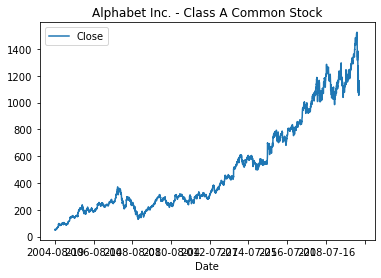

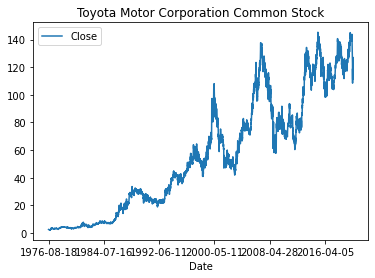

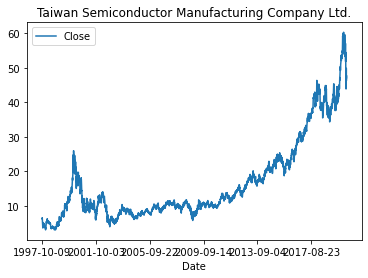

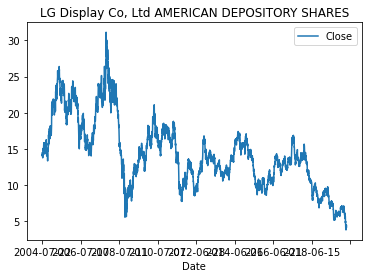

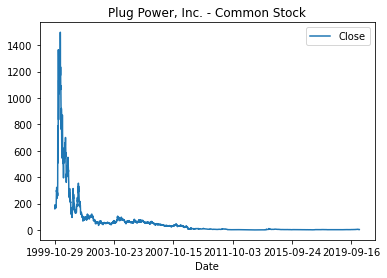

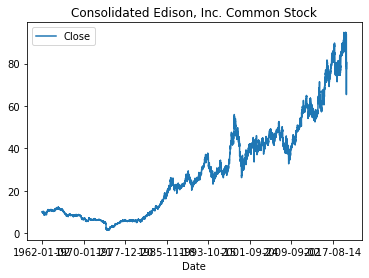

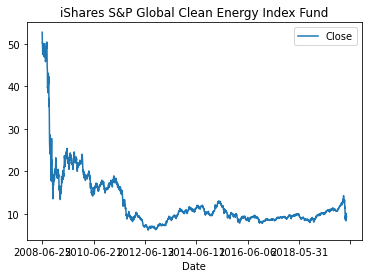

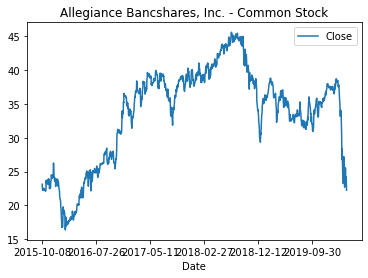

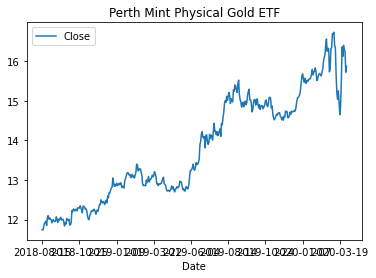

In [294]:
## Main Program

#open portfolio ".json" file
with open('data/portfolio.json', 'r') as f:
  portfolio = json.load(f)

# create new dir 'data/Plots/' so save plots in
newpath = r'data/Plots/' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

# Call function to ask user if he wonts the Stock and/or ETfs data analysed
stocks_t, etfs_t = ask_stock_etf()

# Loop to find all the alle the data(profits & Plots) in the portfolio list
profit_stocks_list = []
profit_etfs_list = []
key = list(portfolio.keys())
for i in key:
    if stocks_t:
        plot_close(i, True)
        if not (profit(i, portfolio, True) == None):
            profit_stocks_list.append(profit(i, portfolio, True))
            
    if etfs_t:
        plot_close(i, False)
        if not (profit(i, portfolio, False) == None):
            profit_etfs_list.append(profit(i, portfolio, False))

# Calling funktion to find the Top and Bottom two stocks and ETFs
top_2_stock = find_top(profit_stocks_list)
bottom_2_stock = find_bottom(profit_stocks_list)
top_2_etf = find_top(profit_etfs_list)
bottom_2_etf = find_bottom(profit_etfs_list)
test3, test4 = find_top_10()

write_to_txt(profit_stocks_list, profit_etfs_list, top_2_stock, bottom_2_stock, top_2_etf, bottom_2_etf, test3, test4)

print("The Plots are saved in:", newpath)
print("The Profits are saved in: 'portfolio_profits.txt'")